# Discussion 10: Some sklearn models learned in the previous lectures

## The materials are adapted from the scikit-learn documentation

## Import the make_circles and make_classification data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

## Compare the performance for different classifiers

Naive Bayes sklearn documentation:
https://scikit-learn.org/stable/modules/naive_bayes.html

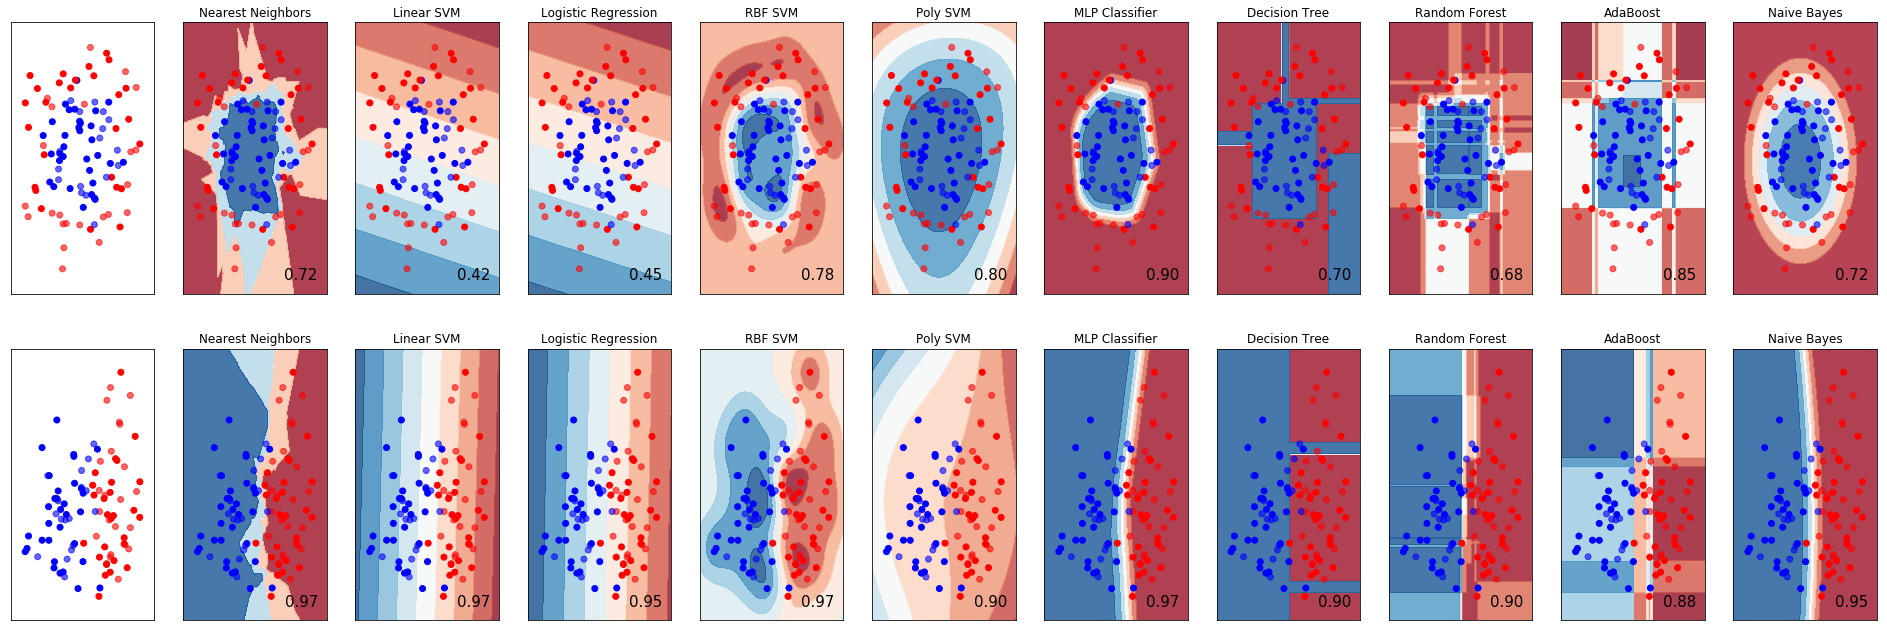

In [4]:
# step size in the mesh grid
h = 0.01

names = ["Nearest Neighbors","Linear SVM", "Logistic Regression", "RBF SVM", "Poly SVM", "MLP Classifier", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    LogisticRegression(),
    SVC(gamma=2, C=1, probability = True),
    SVC(kernel="poly", degree = 3, coef0 = 0.3, probability = True),
    MLPClassifier(max_iter = 3000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()
    ]

# make_classification is linearly separable in this example
# The n_redundunt and n_informatiove should add up to equal to n_features

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


# make_circles and make_classification
# you can change the parameters in the dataset to see the difference

datasets = [make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 11))
i = 1

# iterate over datasets

for ds in datasets:
    
    # preprocess dataset, split into training and test part
    
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    # and testing points
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over all classifiers
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # and testing points
        
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score),
                size=15, horizontalalignment='right')
        i += 1



figure.subplots_adjust(left=.02, right=.98)
plt.show()

## Confusion matrix for all classifiers, make_circles

Confusion matrix with Nearest Neighbors
[[14  4]
 [ 3 19]]
Confusion matrix with Linear SVM
[[18  0]
 [22  0]]
Confusion matrix with Logistic Regression
[[16  2]
 [22  0]]
Confusion matrix with RBF SVM
[[16  2]
 [ 6 16]]
Confusion matrix with Poly SVM
[[16  2]
 [ 4 18]]
Confusion matrix with MLP Classifier
[[16  2]
 [ 2 20]]
Confusion matrix with Decision Tree
[[16  2]
 [ 6 16]]
Confusion matrix with Random Forest
[[16  2]
 [ 6 16]]
Confusion matrix with AdaBoost
[[15  3]
 [ 5 17]]
Confusion matrix with Naive Bayes
[[17  1]
 [ 7 15]]


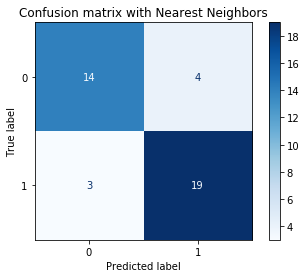

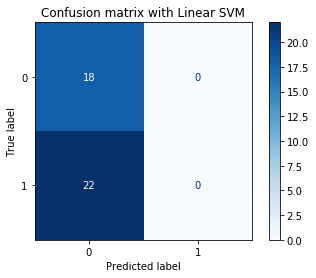

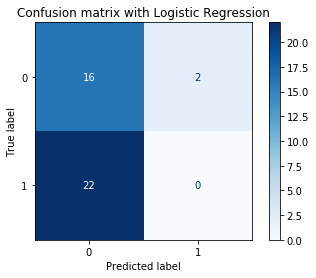

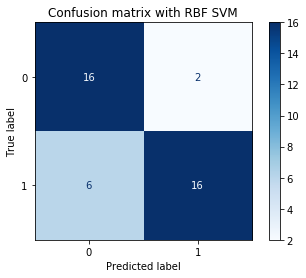

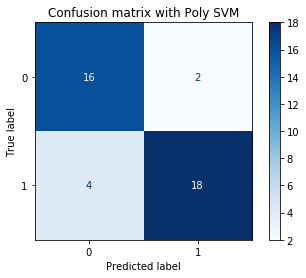

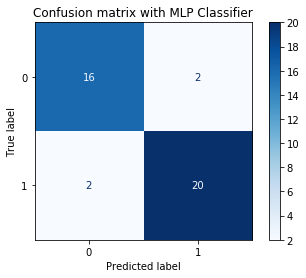

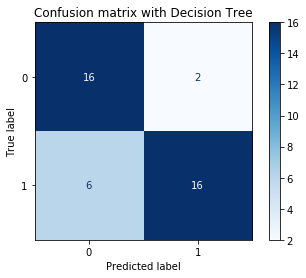

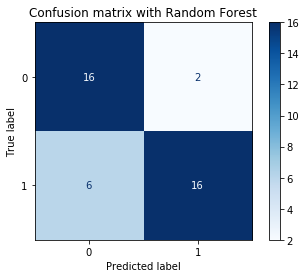

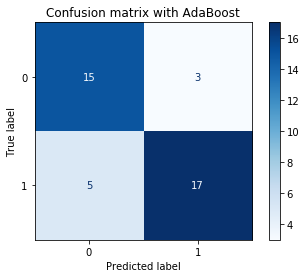

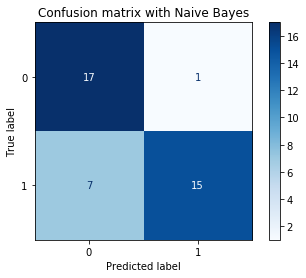

In [3]:
from sklearn.metrics import plot_confusion_matrix

# make circles 
ds = datasets[0]

X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

names = ["Nearest Neighbors", "Linear SVM", "Logistic Regression", "RBF SVM", "Poly SVM", "MLP Classifier", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    LogisticRegression(),
    SVC(gamma=2, C=1, probability = True),
    SVC(kernel="poly", degree = 3, coef0 = 0.3, probability = True),
    MLPClassifier(max_iter = 3000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()
    ]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
        
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap = plt.cm.Blues)
    disp.ax_.set_title("Confusion matrix with {}".format(name))
    
    print("Confusion matrix with {}".format(name))
    print(disp.confusion_matrix)

plt.show()


## Confusion matrix for all classifiers, make_classification

Confusion matrix with Nearest Neighbors
[[19  1]
 [ 1 19]]
Confusion matrix with Linear SVM
[[19  1]
 [ 1 19]]
Confusion matrix with Logistic Regression
[[19  1]
 [ 1 19]]
Confusion matrix with RBF SVM
[[19  1]
 [ 1 19]]
Confusion matrix with Poly SVM
[[18  2]
 [ 1 19]]
Confusion matrix with MLP Classifier
[[19  1]
 [ 1 19]]
Confusion matrix with Decision Tree
[[17  3]
 [ 1 19]]
Confusion matrix with Random Forest
[[19  1]
 [ 1 19]]
Confusion matrix with AdaBoost
[[17  3]
 [ 1 19]]
Confusion matrix with Naive Bayes
[[19  1]
 [ 1 19]]


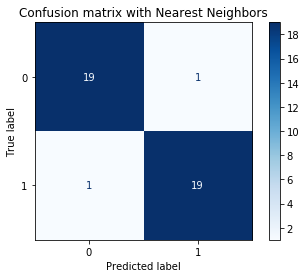

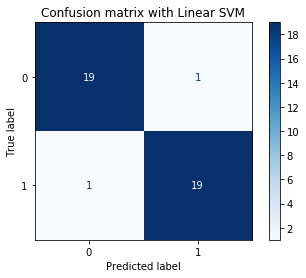

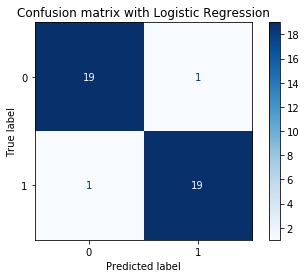

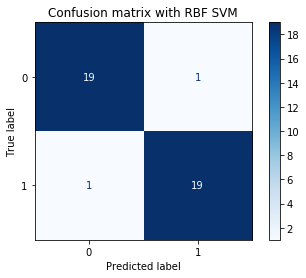

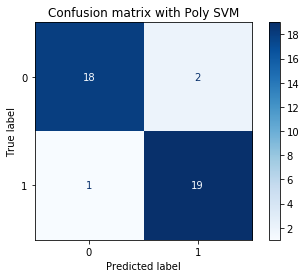

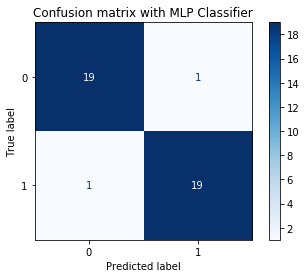

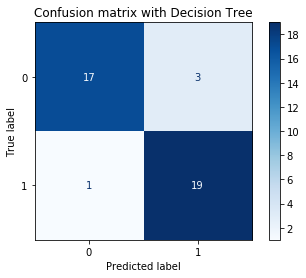

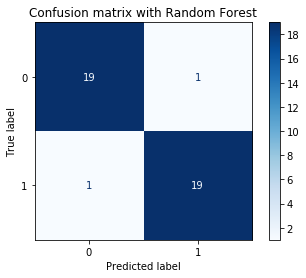

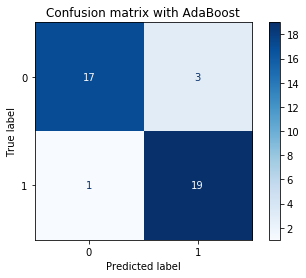

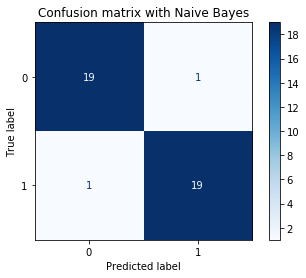

In [4]:
from sklearn.metrics import plot_confusion_matrix

# make classification
ds = datasets[1]

X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

names = ["Nearest Neighbors", "Linear SVM", "Logistic Regression", "RBF SVM", "Poly SVM", "MLP Classifier", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    LogisticRegression(),
    SVC(gamma=2, C=1, probability = True),
    SVC(kernel="poly", degree = 3, coef0 = 0.3, probability = True),
    MLPClassifier(max_iter = 3000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()
    ]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
        
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap = plt.cm.Blues)
    disp.ax_.set_title("Confusion matrix with {}".format(name))
    
    print("Confusion matrix with {}".format(name))
    print(disp.confusion_matrix)

plt.show()
